In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import time

138.430997671 60.8595704834 (112, 92)


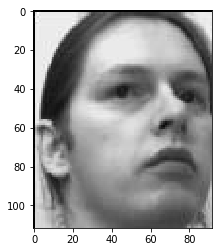

In [2]:
im = Image.open("image/umist_cropped.jpg")
data_orig = np.array(im)

ws = (112,92)
data = data_orig[ws[0]:2*ws[0],ws[1]:ws[1]*2]
print(np.mean(data), np.std(data), data.shape)
plt.imshow(data, cmap='gray')
plt.show()

In [3]:
def sada(X, W, I, K, gamma_shape, gamma_scale, max_iter):
    A_t = np.ones((W,I))*gamma_shape
    B_t = np.ones((W,I))*gamma_scale
    A_v = np.ones((I,K))*gamma_shape
    B_v = np.ones((I,K))*gamma_scale
    
    T = np.random.gamma(A_t,B_t)
    V = np.random.gamma(A_v,B_v)
    
    for n in range(max_iter):

        x_head = T.dot(V)
        
        for k in range(I):
            p = T[ :, [k]].dot(V[ [k], :])/x_head
            S = np.random.binomial(X, p)
            
            alpha_T = A_t[:,k] + np.sum(S, axis = 1)
            alpha_V = A_v[k,:] + np.sum(S, axis = 0)
            
            
            beta_T = 1./(B_t[:,k] + np.sum(V[k,:]))
            beta_V = 1./(B_v[k,:] + np.sum(T[:,k]))
            
            T[:,k] = np.random.gamma(alpha_T, beta_T)
            V[k,:] = np.random.gamma(alpha_V, beta_V)

        if n % 50 == 0:
            mean_diff = np.mean(np.abs(X - np.dot(T,V)))
            print("epoch %d: loss: "%n, mean_diff)
    return T, V

In [4]:
#Initialization
X = data
W = X.shape[0]
K = X.shape[1]
I = 200

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale

T, V = sada(X, W, I, K, gamma_shape, gamma_scale, 400)

epoch 0: loss:  1090.48705437
epoch 50: loss:  651.309542106
epoch 100: loss:  425.868190148
epoch 150: loss:  289.28253734
epoch 200: loss:  205.396100414
epoch 250: loss:  151.033753927
epoch 300: loss:  113.924693768
epoch 350: loss:  90.272210124


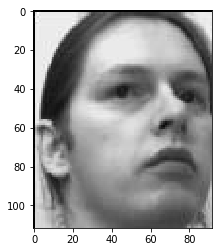

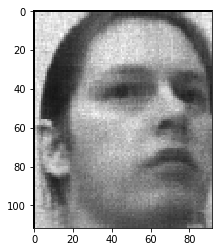

138.430997671 60.8595704834
94.0956446502 39.8809236766


In [5]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()

print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

In [6]:
def sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, max_iter):
    X = X * mask
    
    A_t = np.ones((W,I))*gamma_shape
    B_t = np.ones((W,I))*gamma_scale
    A_v = np.ones((I,K))*gamma_shape
    B_v = np.ones((I,K))*gamma_scale
    
    T = np.random.gamma(A_t,B_t)
    V = np.random.gamma(A_v,B_v)
    
    for n in range(max_iter):

        x_head = T.dot(V)
        for k in range(I):
            p = T[ :, [k]].dot(V[ [k], :])/x_head
            S = np.random.binomial(X, p)
            
            alpha_T = A_t[:,k] + np.sum(S, axis = 1)
            alpha_V = A_v[k,:] + np.sum(S, axis = 0)
            
            beta_T = 1./(B_t[:,k] + (np.einsum("ij,j->i",mask, V[k,:])))
            beta_V = 1./(B_v[k,:] + (np.einsum("ij,i->j",mask, T[:,k])))
            
            T[:,k] = np.random.gamma(alpha_T, beta_T)
            V[k,:] = np.random.gamma(alpha_V, beta_V)
            
        if n % 50 == 0:
            mean_diff = np.mean(np.abs(X - np.dot(T,V)))
            print("epoch %d: loss: "%n, mean_diff)
    return T, V

In [7]:
#Initialization
X = data
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean # b/sqrt(a) == std
gamma_shape = data_mean/gamma_scale

mask = np.ones((W,K)).astype(np.uint8)
mask[30:50,35:60] = 0

T, V = sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 400)

epoch 0: loss:  479.253479221
epoch 50: loss:  279.516802959
epoch 100: loss:  178.28478768
epoch 150: loss:  125.794226042
epoch 200: loss:  87.3278956067
epoch 250: loss:  67.0363010767
epoch 300: loss:  49.4895385291
epoch 350: loss:  40.9884481884


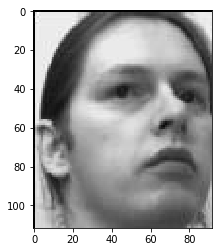

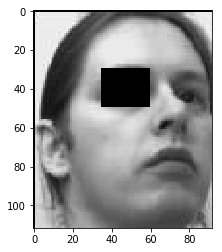

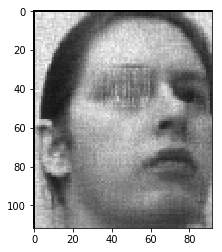

138.430997671 60.8595704834
117.392080347 49.6164943812


In [8]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T,V), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T,V)), np.std(np.dot(T,V)))

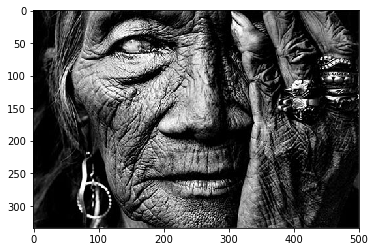

In [9]:
im = Image.open("image/image4.png")
data_orig = np.array(im)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
 
data = rgb2gray(data_orig)    
plt.imshow(data, cmap = 'gray')
plt.show()

In [10]:
#Initialization
X = data.astype(np.uint8)
W = X.shape[0]
K = X.shape[1]
I = 100

data_variance = (np.std(X)/I)**2
data_mean = np.mean(X)/I/2.5

gamma_scale = data_variance/data_mean
gamma_shape = data_mean/gamma_scale

mask = np.ones((W,K)).astype(np.uint8)
mask[100:150,130:160] = 0

T_, V_ = sada_mask(X, mask, W, I, K, gamma_shape, gamma_scale, 250)

epoch 0: loss:  535.461277467
epoch 50: loss:  273.583455487
epoch 100: loss:  162.380119573
epoch 150: loss:  103.956532141
epoch 200: loss:  71.5528546178


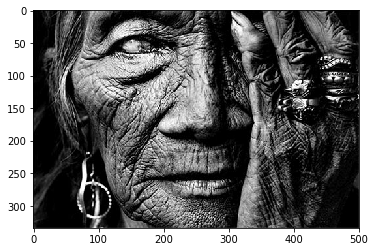

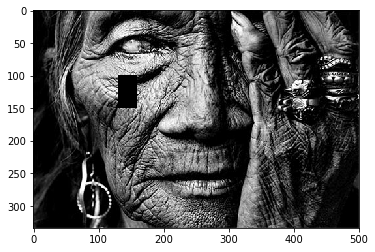

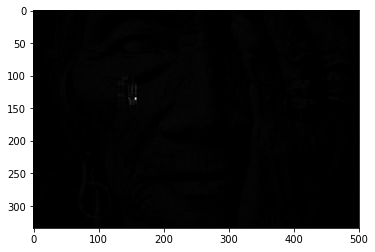

69.7632994012 70.3627717155
42.0862042862 55.092705526


In [12]:
plt.imshow(X, cmap='gray')
plt.show()
plt.imshow(X*mask, cmap='gray')
plt.show()
plt.imshow(np.dot(T_,V_), cmap='gray')
plt.show()
print(np.mean(X), np.std(X))
print(np.mean(np.dot(T_,V_)), np.std(np.dot(T_,V_)))